In [114]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
pd.options.plotting.backend = "plotly"
import os
from ipywidgets import interact, interactive, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [110]:
path_analysis = 'results/2012-2015'
states = ["ssc","in","out","tubes","tendrils","fringe","disconnected"]

df_bowtie = pd.read_json(os.path.join(path_analysis,'bt_comp_count.json'),convert_dates=True).transpose()
total_nodes = df_bowtie[states].sum(axis=1)



In [103]:
#absolut number of nodes in components
range_slider = widgets.SelectionRangeSlider(
    options=df_comp.index.date, index=(0, len(df_comp.index)-1),
    description='Date window', orientation='horizontal', layout={'width': '500px'})

mean_slider = widgets.IntSlider(min=1, max=100, step=1, value=10, 
                                        description='rolling mean')

@interact_manual #@interact
def plot_bt_abs(rolling_mean = mean_slider, date_range = range_slider, scale=['absolute','relative']):
    df_comp = df_bowtie.copy().loc[date_range[0]:date_range[1]][states]
    df_comp.columns.name = 'Bow-tie component'
    if scale == 'relative':
        df_comp = df_comp.div(df_comp.sum(axis=1).values,axis=0)
    df_comp.rolling(window=rolling_mean).mean().plot(title="bow-tie components {}".format(scale)).show()

#interact(plot_bt_abs, window= widgets.IntSlider(min=1, max=100, step=1, value=10))



interactive(children=(IntSlider(value=10, description='rolling mean', min=1), SelectionRangeSlider(description…

In [123]:
# Show markov transition matrix

file = os.path.join(path_analysis, "transition_matrices.json")
states_extened = states + ['inactive']

with open(file, 'r') as tm_file:
    data = tm_file.read()

transition_dict = json.loads(data)

@interact_manual #@interact
def transition_matrix(date_range = range_slider, scale=['absolute','relative']):
    
    date_from , date_to = date_range[0].strftime('%Y-%m-%d'), date_range[1].strftime('%Y-%m-%d')
    tm_matrix = np.zeros(shape=(len(states_extened),len(states_extened)),dtype=int)
    
    date_index = pd.DataFrame({},index=transition_dict.keys())
    keys = date_index.loc[date_from : date_to].index.values
    
    for key in keys:
        tm = transition_dict[key]
        tm_matrix += np.array(np.array(tm))

    df = pd.DataFrame(tm_matrix, index=states_extened, columns=states_extened)
    if scale == 'relative':
        df = df/df.sum().sum()*100
    display(df.style.background_gradient(cmap='Blues')
            .set_caption("Markov state transition matrix for {} to {} in {} numbers"
                         .format(date_from, date_to, scale)))

interactive(children=(SelectionRangeSlider(description='Date window', index=(0, 1460), layout=Layout(width='50…

In [21]:
# plot basic stats
df = pd.read_json("btc-stats/test.json",convert_dates=True)

In [27]:
df

,g_nodes,g_edges,g_density,std_in,std_out,skew_in,skew_out,date
0,61,57,0.015574,4.762796,0.247536,5.595091,-3.510011,2009-01-26
1,41,40,0.024390,6.170298,0.154257,6.166441,-6.166441,2009-05-04
2,48,42,0.018617,1.393811,0.563656,2.439452,-0.021813,2010-02-08
3,580,613,0.001825,3.875458,0.708474,6.713588,3.496691,2010-04-26
4,2274,2943,0.000569,5.520418,0.973750,18.673123,2.576739,2010-09-06
5,5198,7097,0.000263,6.896660,2.135612,32.746033,32.858714,2010-10-18
6,39598,63771,0.000041,6.673984,10.508480,74.631613,112.247797,2011-10-17
7,41257,67253,0.000040,11.410783,8.955738,85.910207,75.334588,2011-10-31
8,64094,128281,0.000031,9.011946,14.567631,55.308155,152.434636,2011-11-28
9,35158,57050,0.000046,18.245178,19.176162,138.294363,119.080654,2012-01-30


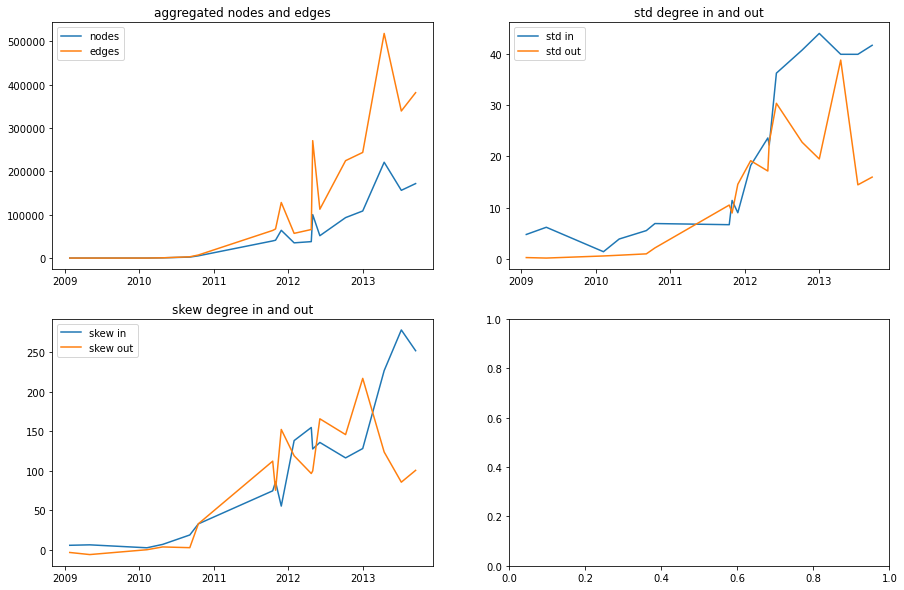

In [54]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2)
fig.set_size_inches(15,10)

ax1.plot(df["date"],df["g_nodes"], label="nodes")
ax1.plot(df["date"],df["g_edges"], label="edges")
ax1.legend()
ax1.set_title("aggregated nodes and edges")

ax2.plot(df["date"],df["std_in"], label="std in")
ax2.plot(df["date"],df["std_out"], label="std out")
ax2.legend()
ax2.set_title("std degree in and out")

ax3.plot(df["date"],df["skew_in"], label="skew in")
ax3.plot(df["date"],df["skew_out"], label="skew out")
ax3.legend()
ax3.set_title("skew degree in and out")

plt.show()